<span id="menu"></span>
# Universe Analysis－using get_universe

分析股票池的產業分布與成交金額

選單

1. [分析臺灣50指數成份股公司的產業分佈](#臺灣50)
2. [分析臺灣中型100指數成份股公司的產業分佈](#臺灣100)
3. [分析臺灣高股息指數成份股公司的產業分佈](#臺灣高股息)
4. [分析半導體業指數成份股公司的產業分佈](#半導體)
5. [分析上市ETF成交金額](#上市ETF)

In [1]:
import tejapi
import os
import numpy as np
import pandas as pd

# set tej_key and base
tej_key = 'your key'
api_base = 'https://api.tej.com.tw'

os.environ['TEJAPI_KEY'] = tej_key
os.environ['TEJAPI_BASE']= api_base

tejapi.ApiConfig.api_key = tej_key  
tejapi.ApiConfig.api_base = api_base

# set date
start = end = '2023-10-24'

from matplotlib import pyplot as plt
plt.rc("font",family='MicroSoft YaHei',weight="bold")

import TejToolAPI
from zipline.sources.TEJ_Api_Data import get_universe

利用`get_universe`取得台灣50指數成份股

In [2]:
tw50_ = get_universe(start, end, idx_id='IX0002')

In [3]:
tw50_ 

['1101',
 '1216',
 '1301',
 '1303',
 '1326',
 '1590',
 '2002',
 '2207',
 '2301',
 '2303',
 '2308',
 '2317',
 '2327',
 '2330',
 '2345',
 '2357',
 '2379',
 '2382',
 '2395',
 '2408',
 '2412',
 '2454',
 '2603',
 '2801',
 '2880',
 '2881',
 '2882',
 '2883',
 '2884',
 '2885',
 '2886',
 '2887',
 '2890',
 '2891',
 '2892',
 '2912',
 '3008',
 '3034',
 '3037',
 '3045',
 '3231',
 '3711',
 '4904',
 '4938',
 '5871',
 '5876',
 '5880',
 '6505',
 '6669',
 '9910']

`getUniverseSector`：繪製股票池產業分佈柱狀圖與圓餅圖

In [4]:
def plot_sector_counts(sector_counts):
    
    # create bar chart of number of companies in each sector    
    from matplotlib import pyplot as plt
    plt.rc("font",family='MicroSoft YaHei',weight="normal")
    
    from matplotlib.ticker import MaxNLocator
    import matplotlib.ticker as ticker
        
    plt.figure(figsize=(12, 15), dpi=100)
    
    bar = plt.subplot2grid((5,5), (0,0), rowspan=2, colspan=5)
    pie = plt.subplot2grid((5,5), (2,0), rowspan=3, colspan=5)
    
    # Bar chart
    sector_counts.plot(
        kind='barh',        
        color='b',
#         rot=90,
        grid=True,
        fontsize=12,
        ax=bar,
    )

    plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
    bar.set_title('股票池產業分布家數')
    bar.set_xlabel('家數')     

    
    num = list(sector_counts.values)
    explode = [0.1 if x == max(num) else 0 for x in num]
    
    # Pie chart
    sector_counts.plot(
        kind='pie', 
        colormap='Set3', 
        autopct='%.1f %%', # '%.2f %%'
        fontsize=12,
        ax=pie,
        labeldistance=1.1,
        pctdistance=0.9,
        explode = explode
    ) 
    pie.set_ylabel('')      
    pie.set_title('股票池產業分布占比 - %')
    
    
    plt.tight_layout(pad=5);
    
def getUniverseSector(index_constitue,start_date,end_date):
    
    try:
        tickers = get_universe(start_date, end_date, idx_id=index_constitue)
    except:
        tickers = get_universe(start_date, end_date, industry_c=index_constitue)        
    
    df_sector = TejToolAPI.get_history_data(ticker=tickers, columns=['Industry'], transfer_to_chinese=True,
                                       start = start_date,
                                       end = end_date)   

    counts = (df_sector.groupby('產業別_中文').size())
    _c =[]
    counts.index = [ x.split(' ')[1]  if len(x)>0 else ' ' for x in counts.index]
    
    plot_sector_counts(counts[counts>0].sort_values(ascending=False)) 

<span id="臺灣50"></span>
# 分析臺灣50指數成份股公司的產業分佈
[Return to Menu](#menu)

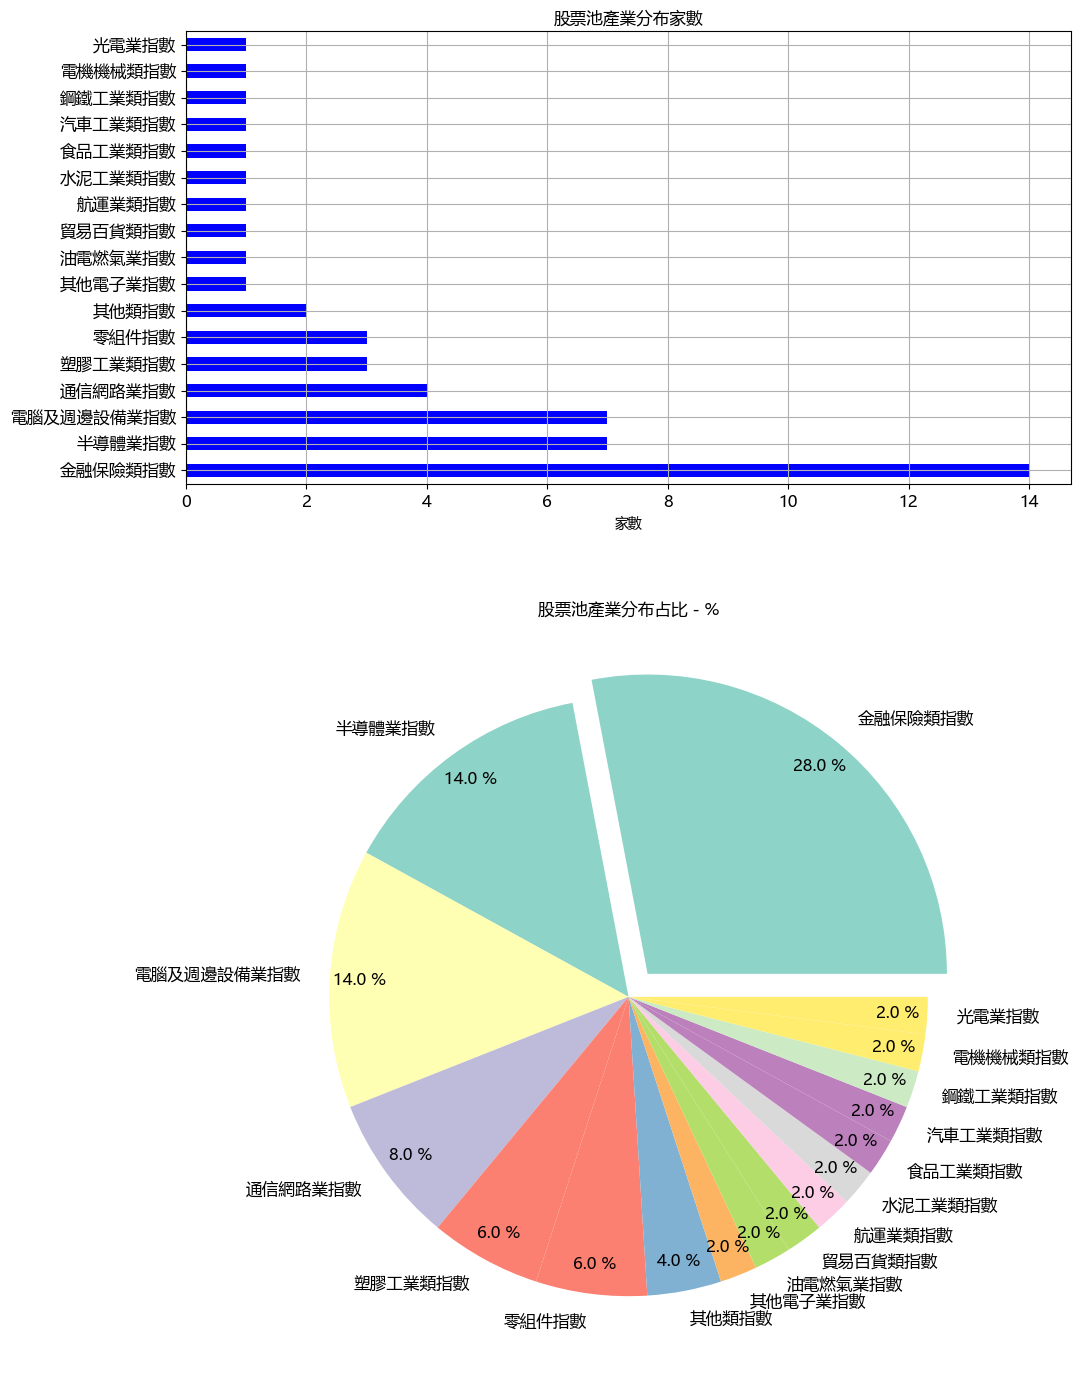

In [5]:
getUniverseSector('IX0002',start, end)

<span id="臺灣100"></span>
# 分析臺灣中型100指數成份股公司的產業分佈
[Return to Menu](#menu)

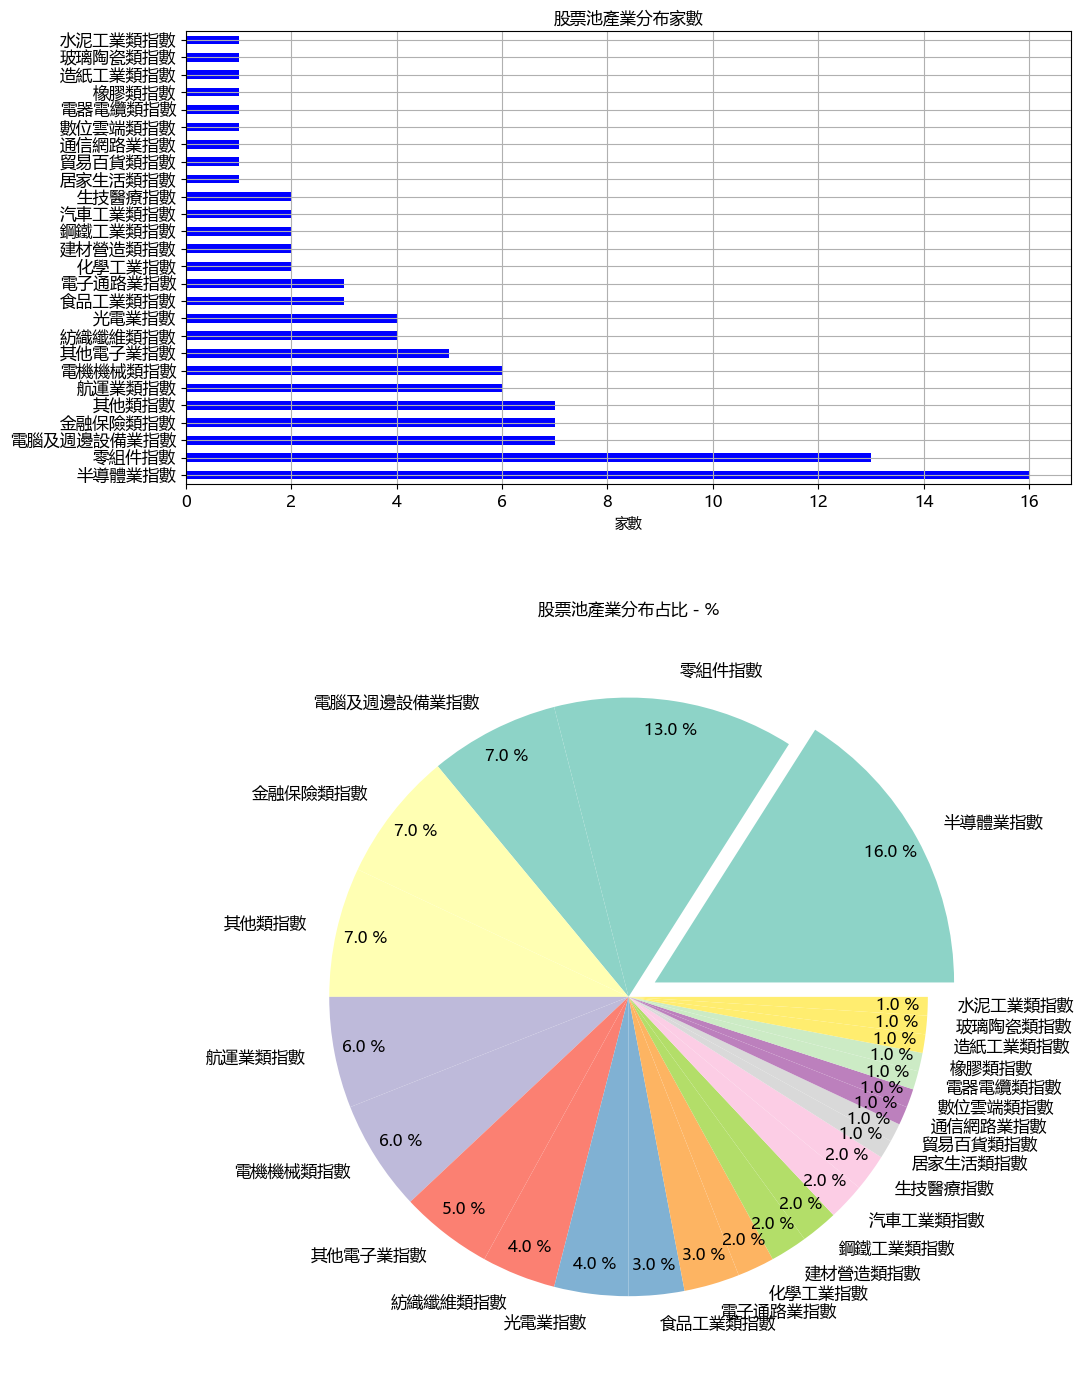

In [6]:
getUniverseSector('IX0003',start, end)

<span id="臺灣高股息"></span>
# 分析臺灣高股息指數成份股公司的產業分佈
[Return to Menu](#menu)

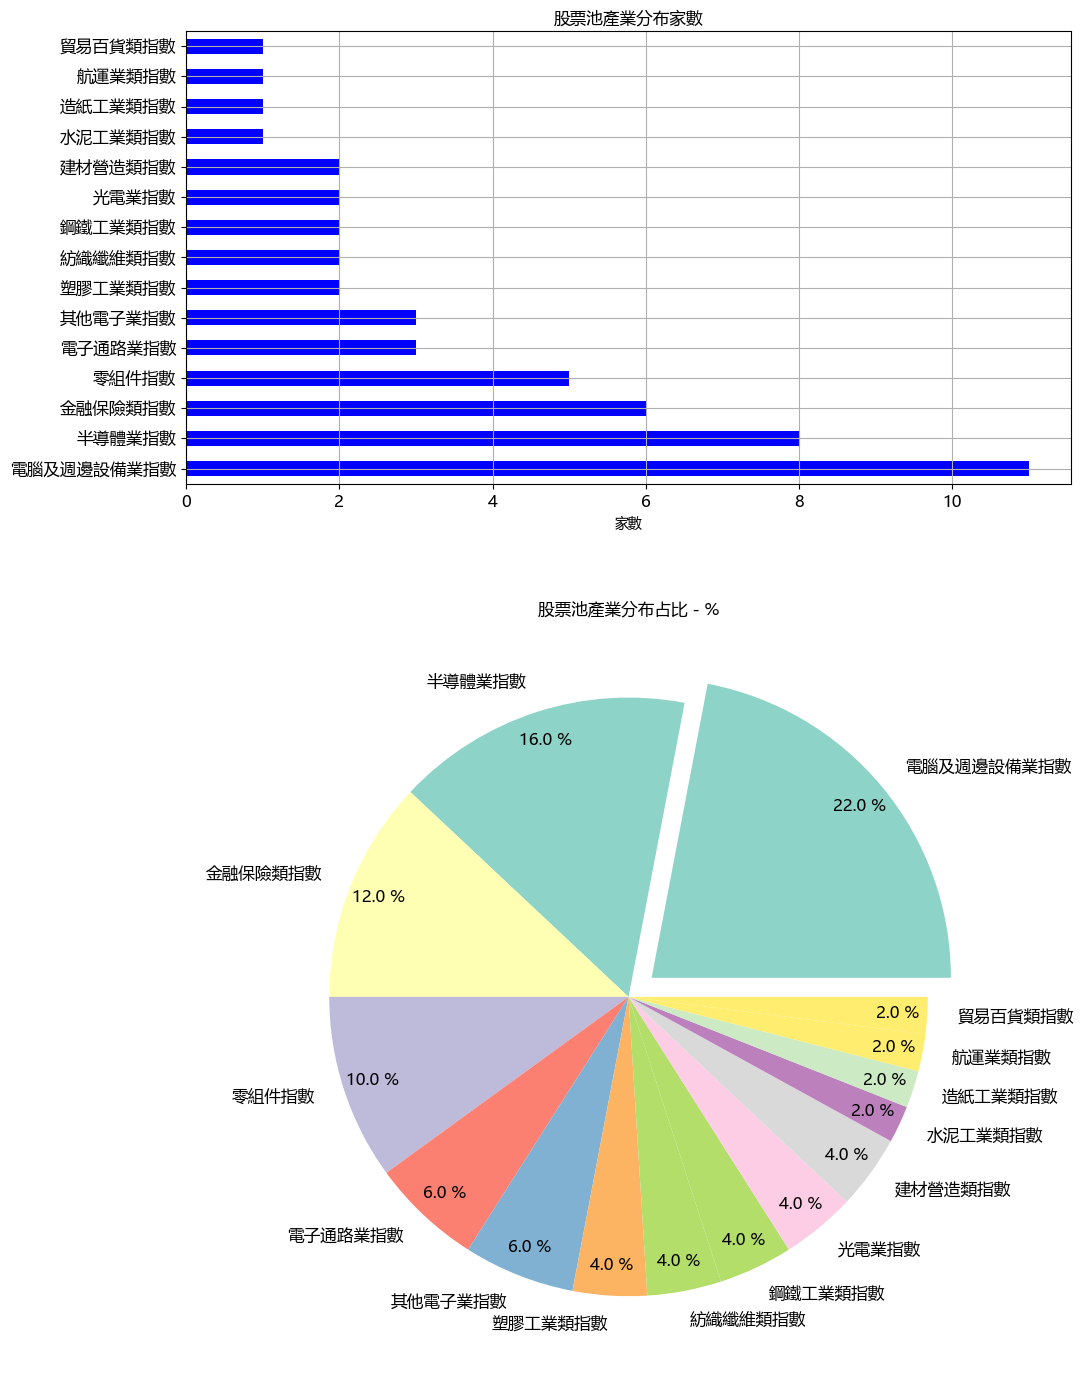

In [7]:
getUniverseSector('IX0006',start, end)

<span id="半導體"></span>
# 分析半導體業指數成份股公司的產業分佈
[Return to Menu](#menu)

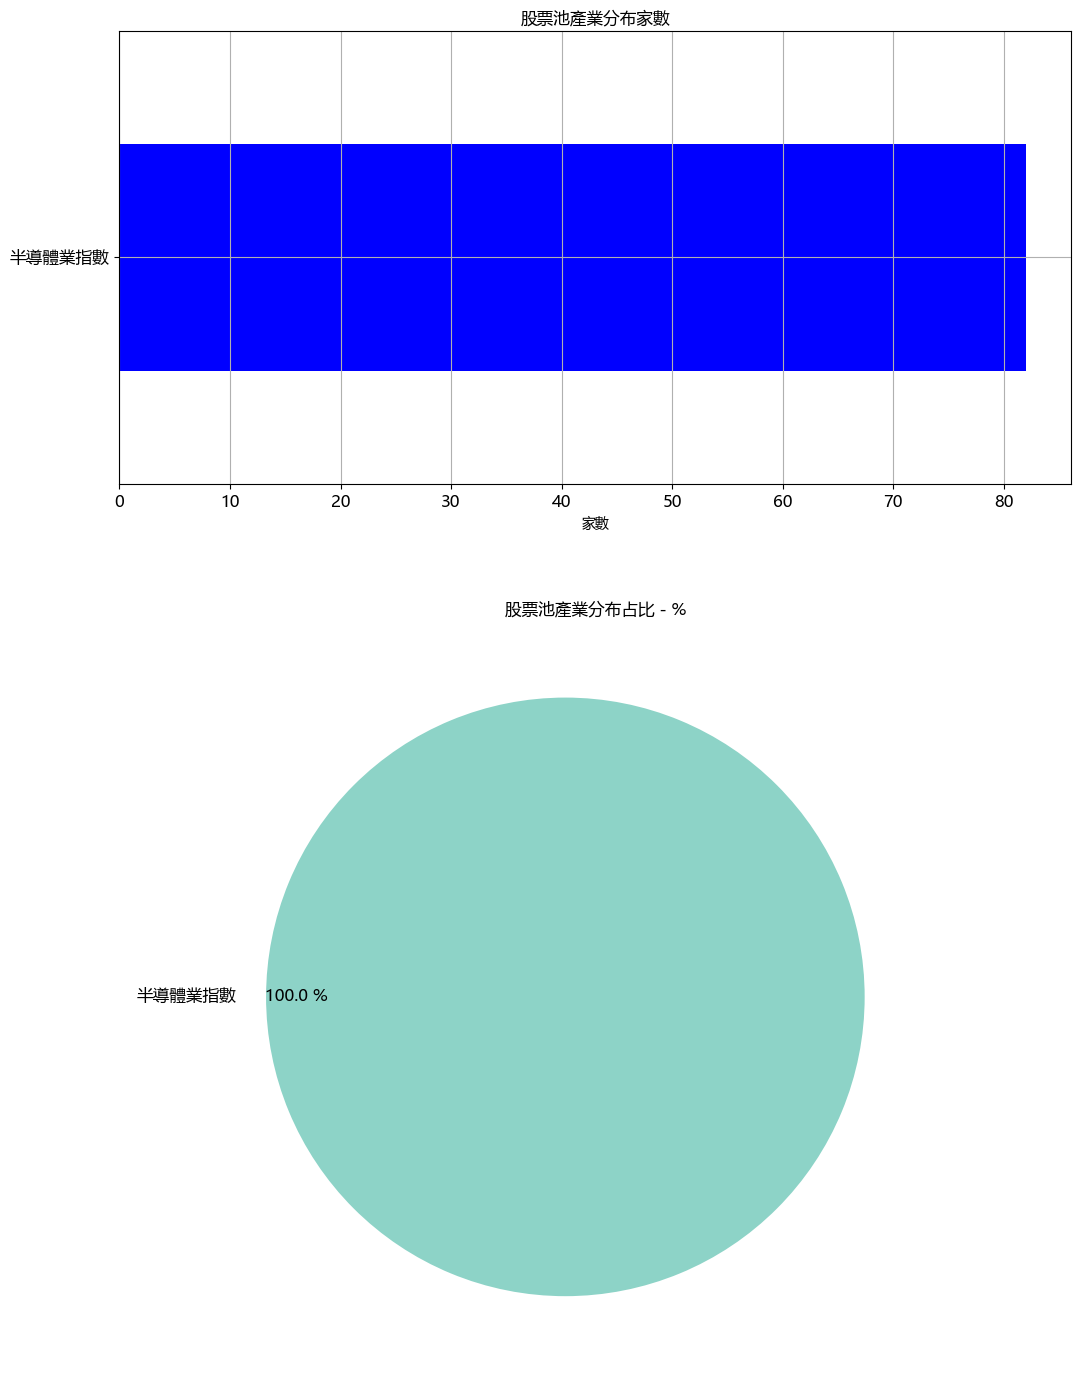

In [8]:
getUniverseSector('M2324 半導體業指數',start, end)

<span id="上市ETF"></span>
# 分析上市ETF成交金額
[Return to Menu](#menu)

In [9]:
etf = get_universe(start, end, stktp_c=['ETF'], mkt=['TWSE'])

In [10]:
df_amount = TejToolAPI.get_history_data(ticker=etf, columns=['Value_Dollars'], transfer_to_chinese=False,
                                       start = '2023-01-01',
                                       end = end
                                       )  

In [11]:
df_top = df_amount.set_index(['coid','mdate']).unstack('coid').rolling(30).mean().iloc[-1].sort_values(ascending=False)['Value_Dollars'] #['成交金額_元']

In [12]:
df_top=df_top.to_frame().join(tejapi.get('TWN/APISTOCK')[['coid','stk_name']].set_index('coid')).set_index('stk_name').iloc[:,0]

Text(0.5, 1.0, '上市ETF 過去30日的平均成交金額 Top20（2023-10-24）')

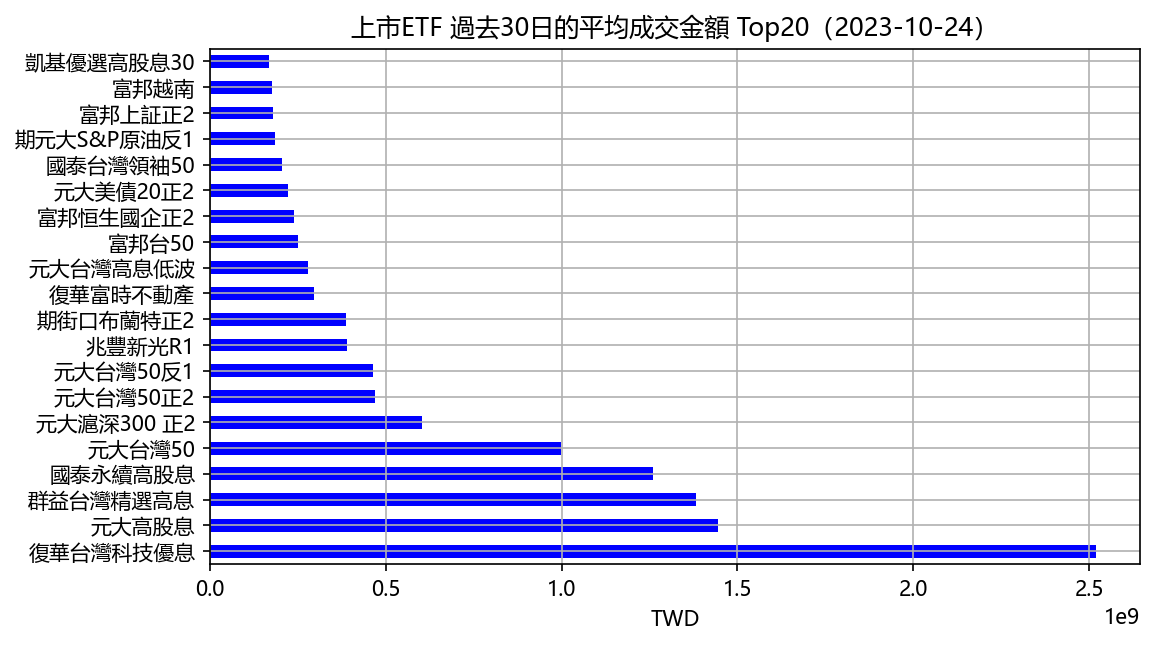

In [13]:
plt.figure(figsize=(8, 12), dpi=150)
    
bar = plt.subplot2grid((5,5), (0,0), rowspan=2, colspan=5)
    
df_top.nlargest(20).plot(
        kind='barh',        
        color='b',
#         rot=90,
        grid=True,
        ax=bar
    )
   
bar.set_xlabel('TWD')
bar.set_ylabel('')
bar.set_title('上市ETF 過去30日的平均成交金額 Top20（{}）'.format(df_amount.mdate.max().strftime('%Y-%m-%d')))

[Return to Menu](#menu)